In [32]:
%matplotlib inline

import matplotlib.pyplot as plt

In [33]:
import numpy as np
import pandas as pd

In [34]:
import datetime as dt

Reflect Tables into SQLAlchemy ORM

In [35]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [36]:
engine = create_engine("sqlite:///C:/Users/bvkka/WUSTL201904DATA2/02-Homework/10-Advanced-Data-Storage-and-Retrieval/Instructions/Resources/hawaii.sqlite")


In [37]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [38]:
 # We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [39]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [40]:
# Create our session (link) from Python to the DB
session = Session(engine)

Exploratory Climate Analysis

In [41]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [42]:
latestDate = (session.query(Measurement.date)
                     .order_by(Measurement.date.desc())
                     .first())

In [43]:

#extract string from query object
latestDate = list(np.ravel(latestDate))[0]

In [44]:
#convert date string to datetime object
latestDate = dt.datetime.strptime(latestDate, '%Y-%m-%d')

In [45]:
#extract year, month, and day as integers
latestYear = int(dt.datetime.strftime(latestDate, '%Y'))
latestMonth = int(dt.datetime.strftime(latestDate, '%m'))
latestDay = int(dt.datetime.strftime(latestDate, '%d'))


In [46]:
#calculate one year before latest date
yearBefore = dt.date(latestYear, latestMonth, latestDay) - dt.timedelta(days=365)

In [47]:
#query for dates and precipitation for the latest year
rainData = (session.query(Measurement.date, Measurement.prcp)
                  .filter(Measurement.date > yearBefore)
                  .order_by(Measurement.date)
                  .all())

In [48]:
#convert query object to data frame and set index
rainTable = pd.DataFrame(rainData)
rainTable = rainTable.set_index('date')

In [49]:
#sort by date
rainTable = rainTable.sort_index(ascending=True)

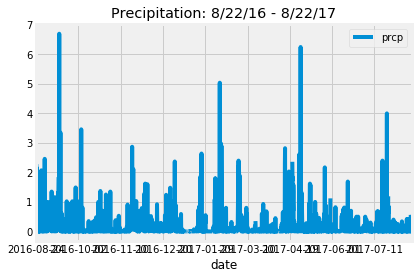

In [50]:
#plot with pandas
rainTable.plot(title="Precipitation: 8/22/16 - 8/22/17")

In [51]:
#summarize the data
rainTable.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [52]:
#query for station count
stationsCount = session.query(Station).count()
print(f"Station Count: {stationsCount}")

Station Count: 9


In [53]:
#query for the number of observations per station
stationCounts = (session.query(Measurement.station, func.count(Measurement.station))
                        .group_by(Measurement.station)
                        .order_by(func.count(Measurement.station).desc())
                        .all())
stationCounts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [54]:
#set the most active station
stationID = stationCounts[0][0]

In [55]:
#query for station name
stationName = (session.query(Station.name)
                      .filter_by(station = stationID))
stationName = stationName[0][0]
print(f"The most active station is {stationID}: {stationName}.")


The most active station is USC00519281: WAIHEE 837.5, HI US.


In [56]:
#query for highest temperature
highestTemp = (session.query(Measurement.tobs)
                      .filter(Measurement.station == stationID)
                      .order_by(Measurement.tobs.desc())
                      .first())
highestTemp = highestTemp[0]
print(f"The highest temperature recorded there is {highestTemp} degrees Farenheit.")

The highest temperature recorded there is 85.0 degrees Farenheit.


In [57]:
#query for lowest temperature
lowestTemp = (session.query(Measurement.tobs)
                     .filter(Measurement.station == stationID)
                     .order_by(Measurement.tobs.asc())
                     .first())
lowestTemp = lowestTemp[0]
print(f"The lowest temperature recorded there is {lowestTemp} degrees Farenheit.")


The lowest temperature recorded there is 54.0 degrees Farenheit.


In [58]:
#query for average temperature
avgTemp = (session.query(func.avg(Measurement.tobs))
                  .filter(Measurement.station == stationID))
avgTemp = '{0:.3}'.format(avgTemp[0][0])
print(f"The average temperature recorded there is {avgTemp} degrees Farenheit.")

The average temperature recorded there is 71.7 degrees Farenheit.


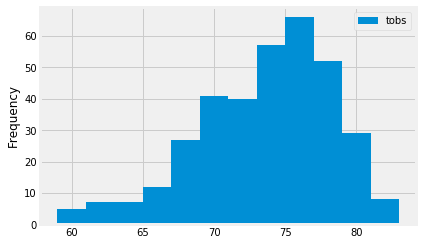

In [59]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
tempData = (session.query(Measurement.date, Measurement.tobs)
                   .filter(Measurement.date > yearBefore)
                   .filter(Measurement.station == stationID)
                   .order_by(Measurement.date)
                   .all())

#convert query object to data frame
tempTable = pd.DataFrame(tempData)
tempTable = tempTable.set_index('date')

#sory by date
tempTable = tempTable.sort_index(ascending=True)

#histogram plot with pandas
tempTable.plot(kind='hist', bins=12)